# Closeness Centrality

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import networkx as nx
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas_ppw/detik.csv")
data

,Judul,Isi,Kategori
0,Link dan Cara Daftar PPG Prajabatan Gelombang ...,Pendaftaran Pendidikan Profesi Guru (PPG) Praj...,Edukasi
1,"Job Fair Nasional Usai, 56.566 Lowongan Kerja ...",Festival Pelatihan Vokasi (FPV) dan Job Fair N...,Finance
2,Legitnya Empal Goreng Madiun di 'Gado-gado Mak...,"Di kawasan Serpong, Tangerang Selatan, ada rum...",Food
3,Hasil F1 GP Meksiko 2023: Verstappen Pecahkan ...,Max Verstappen berhasil memenangkan Formula 1 ...,Sport
4,"IHSG Diprediksi Menguat Terbatas, Simak Rekome...",Indeks Harga Saham Gabungan (IHSG) pada perdag...,Finance
...,...,...,...
155,"Ilmuwan Teliti Perilaku Ayam di Depan Cermin, ...","Sebuah tim peneliti, yang dipimpin oleh mahasi...",Edukasi
156,"Kantor Dirjen Hortikultura Digeledah KPK, Ment...",Menteri Pertanian Amran Sulaiman buka suara so...,Finance
157,"3 Kopi Favorit Capres 2024, Kopi Hambalang hin...",Capres 2024 rupanya punya kopi favorit. Mulai ...,Food
158,Antusiasme Pengunjung THE Talk Global Study Fa...,"Lembaga pemeringkatan universitas dunia, Times...",Edukasi


## Tokenisasi per Kalimat

In [ ]:
hasil_kalimat=[]
for i in range(len(data)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [ ]:
kalimat = []
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)

In [ ]:
databaru = pd.DataFrame(kalimat, columns=["Dokumen ke", "Kalimat"])
databaru

,Dokumen ke,Kalimat
0,0,Pendaftaran Pendidikan Profesi Guru (PPG) Praj...
1,0,Dikutip dari Pengumuman Nomor: 6412/B/GT.00.05...
2,0,"Kesepuluhnya yaitu PGSD, bahasa Indonesia, mat..."
3,0,"Selanjutnya ada sejarah, seni budaya, bimbinga..."
4,0,"Nantinya, calon mahasiswa yang dinyatakan lulu..."
...,...,...
3575,159,"Setelah 10 ronde digelar, akhirnya pemenang di..."
3576,159,Fury dinyatakan keluar menjadi pemenang angka ...
3577,159,"Melansir BBC, salah satu juri memberi Ngannou ..."
3578,159,Kemenangan ini membuat Gypsy King melanjutkan ...


## TF-TDF

In [ ]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(databaru['Kalimat'])

## Cosine Similarity

In [ ]:
# Menghitung cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

## Closeness Centrality

In [ ]:
# Membuat graf untuk closeness centrality
G = nx.from_numpy_array(cosine_similarities)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menambahkan closeness centrality ke dalam dataframe kalimat
databaru['Closeness Centrality'] = [closeness_centrality[i] for i in range(len(databaru))]

# Menampilkan dataframe kalimat
print(databaru)

      Dokumen ke                                            Kalimat  \
0              0  Pendaftaran Pendidikan Profesi Guru (PPG) Praj...   
1              0  Dikutip dari Pengumuman Nomor: 6412/B/GT.00.05...   
2              0  Kesepuluhnya yaitu PGSD, bahasa Indonesia, mat...   
3              0  Selanjutnya ada sejarah, seni budaya, bimbinga...   
4              0  Nantinya, calon mahasiswa yang dinyatakan lulu...   
...          ...                                                ...   
3575         159  Setelah 10 ronde digelar, akhirnya pemenang di...   
3576         159  Fury dinyatakan keluar menjadi pemenang angka ...   
3577         159  Melansir BBC, salah satu juri memberi Ngannou ...   
3578         159  Kemenangan ini membuat Gypsy King melanjutkan ...   
3579         159  Sementara Ngannou langsung kalah pada laga pro...   

      Closeness Centrality  
0                 0.534490  
1                 0.664822  
2                 0.584565  
3                 0.584173  
4 

In [ ]:
databaru

,Dokumen ke,Kalimat,Closeness Centrality
0,0,Pendaftaran Pendidikan Profesi Guru (PPG) Praj...,0.534490
1,0,Dikutip dari Pengumuman Nomor: 6412/B/GT.00.05...,0.664822
2,0,"Kesepuluhnya yaitu PGSD, bahasa Indonesia, mat...",0.584565
3,0,"Selanjutnya ada sejarah, seni budaya, bimbinga...",0.584173
4,0,"Nantinya, calon mahasiswa yang dinyatakan lulu...",0.695083
...,...,...,...
3575,159,"Setelah 10 ronde digelar, akhirnya pemenang di...",0.511860
3576,159,Fury dinyatakan keluar menjadi pemenang angka ...,0.507236
3577,159,"Melansir BBC, salah satu juri memberi Ngannou ...",0.517490
3578,159,Kemenangan ini membuat Gypsy King melanjutkan ...,0.570672


In [ ]:
databaru.to_csv('/content/drive/MyDrive/ppw/tugas/tugas_ppw/closeness_centrality.csv', index=False)

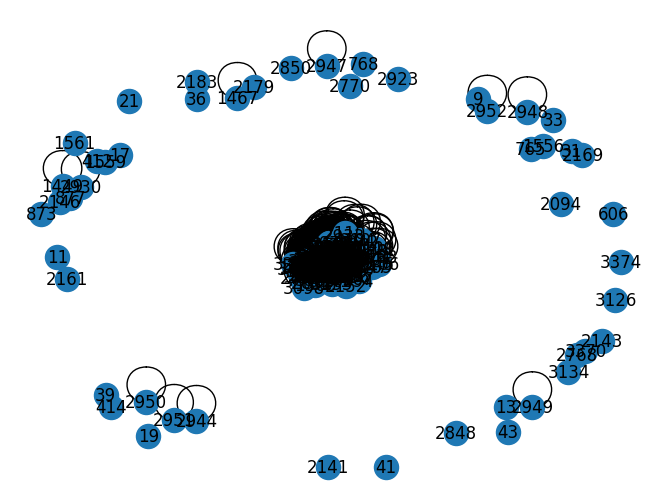

In [ ]:
nx.draw(G, with_labels=True)

## Hasil Ringkasan

In [ ]:
threshold = 0.7
baris_lebih_dari_05 = databaru.loc[databaru['Closeness Centrality'] > threshold]

# Menampilkan baris dengan nilai lebih besar dari 0,5 pada kolom 'Skor'
baris_lebih_dari_05


,Dokumen ke,Kalimat,Closeness Centrality
22,0,Login pada aplikasi SIMPKB dengan menggunakan ...,0.700961
56,1,"""Dengan animo yang sangat tinggi ini mudah-mud...",0.765539
79,3,"Pada lap ke-40, Verstappen masih memimpin bala...",0.701243
86,3,Kemenangan ini menjadi yang ke-16 bagi Verstap...,0.727926
90,4,"Mengutip riset Ajaib Sekuritas, adapun sentime...",0.787887
...,...,...,...
3479,156,SCROLL TO CONTINUE WITH CONTENT Data yang diam...,0.722488
3519,157,Kopi robusta Lampung sebenarnya ada beberapa j...,0.718166
3531,157,"Menurut mantan Gubernur DKI Jakarta ini, terca...",0.741096
3541,158,Tapi ada beberapa stand yang mungkin bahasanya...,0.739994


In [ ]:
# Menggabungkan teks 'Kalimat' berdasarkan 'Dokumen ke' yang sama
result = baris_lebih_dari_05.groupby('Dokumen ke')['Kalimat'].apply(' '.join).reset_index()

# Menampilkan hasil penggabungan
result

,Dokumen ke,Kalimat
0,0,Login pada aplikasi SIMPKB dengan menggunakan ...
1,1,"""Dengan animo yang sangat tinggi ini mudah-mud..."
2,3,"Pada lap ke-40, Verstappen masih memimpin bala..."
3,4,"Mengutip riset Ajaib Sekuritas, adapun sentime..."
4,5,SCROLL TO CONTINUE WITH CONTENT Kualitas ini m...
...,...,...
109,153,"[Gambas:Twitter] ""Saya mencoba yang terbaik h..."
110,155,"Sebuah tim peneliti, yang dipimpin oleh mahasi..."
111,156,SCROLL TO CONTINUE WITH CONTENT Data yang diam...
112,157,Kopi robusta Lampung sebenarnya ada beberapa j...
